In [1]:
import numpy as np 
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filelocation = r"E:\Rnw\python\data_cleanser\patient_health_records_200k_realistic.csv"
df = pd.read_csv(filelocation)
df.head()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,1,69.0,Male,North,32.27,116.58,184.29,77.47,0
1,2,32.0,Male,East,18.83,122.60,196.59,92.93,0
2,3,89.0,Female,North,24.99,125.70,206.05,96.28,1
3,4,78.0,Male,East,24.26,117.13,NaN,80.78,0
4,5,38.0,Male,South,31.50,128.49,NaN,57.46,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patient_id      200000 non-null  int64  
 1   age             190000 non-null  float64
 2   gender          190041 non-null  object 
 3   region          189830 non-null  object 
 4   bmi             194000 non-null  float64
 5   blood_pressure  200000 non-null  float64
 6   cholesterol     192000 non-null  float64
 7   glucose         194000 non-null  float64
 8   disease_risk    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,patient_id,age,bmi,blood_pressure,cholesterol,glucose,disease_risk
count,200000.000000,190000.000000,194000.000000,200000.000000,192000.000000,194000.000000,200000.000000
mean,100000.500000,53.414632,25.378103,120.988374,198.776561,102.242065,0.562225
std,57735.171256,20.763805,6.325087,17.981803,32.229675,29.583152,0.496114
min,1.000000,18.000000,3.400000,44.270000,40.760000,2.000000,0.000000
25%,50000.750000,35.000000,21.670000,110.010000,178.990000,86.780000,0.000000
50%,100000.500000,53.000000,25.080000,120.170000,199.570000,100.280000,1.000000
75%,150000.250000,71.000000,28.500000,130.380000,219.980000,113.990000,1.000000
max,200000.000000,89.000000,106.810000,270.340000,327.480000,381.290000,1.000000


In [5]:
df.describe(include='object')


,gender,region
count,190041,189830
unique,2,4
top,Male,South
freq,95932,48388


In [6]:
(df.isnull().sum() / len(df)) * 100


patient_id        0.0000
age               5.0000
gender            4.9795
region            5.0850
bmi               3.0000
blood_pressure    0.0000
cholesterol       4.0000
glucose           3.0000
disease_risk      0.0000
dtype: float64

In [7]:
df.duplicated().sum()


np.int64(0)

In [8]:
df.columns

Index(['patient_id', 'age', 'gender', 'region', 'bmi', 'blood_pressure',
       'cholesterol', 'glucose', 'disease_risk'],
      dtype='object')

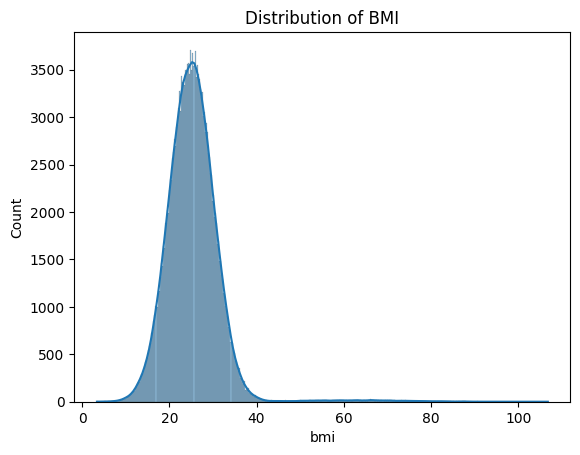

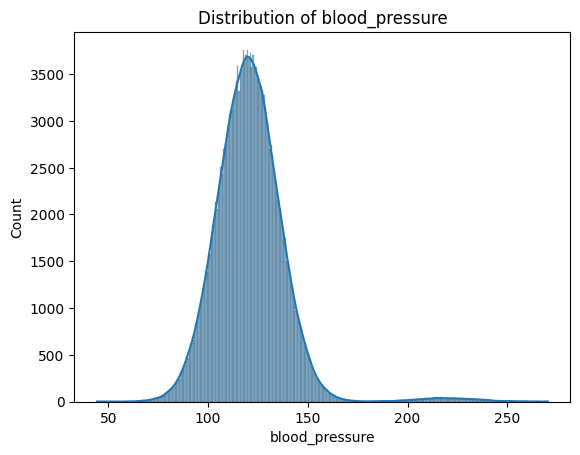

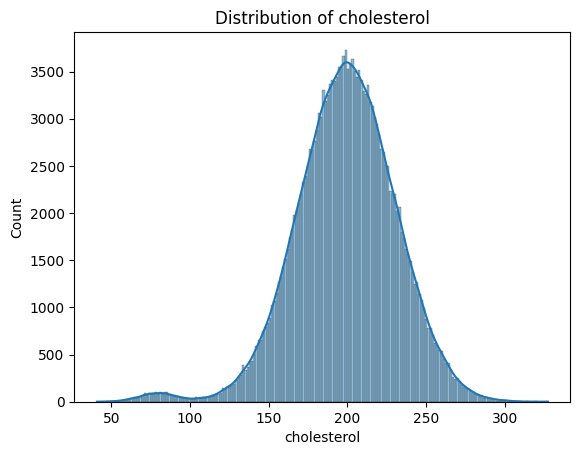

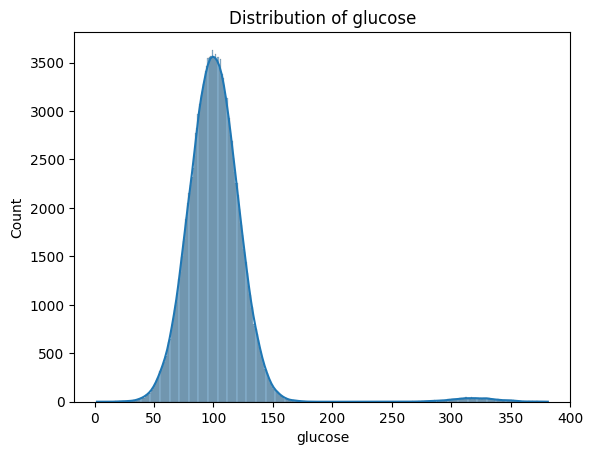

In [9]:
plt.figure()
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.show()

plt.figure()
sns.histplot(df['blood_pressure'], kde=True)
plt.title("Distribution of blood_pressure")
plt.show()

plt.figure()
sns.histplot(df['cholesterol'], kde=True)
plt.title("Distribution of cholesterol")
plt.show()

plt.figure()
sns.histplot(df['glucose'], kde=True)
plt.title("Distribution of glucose")
plt.show()




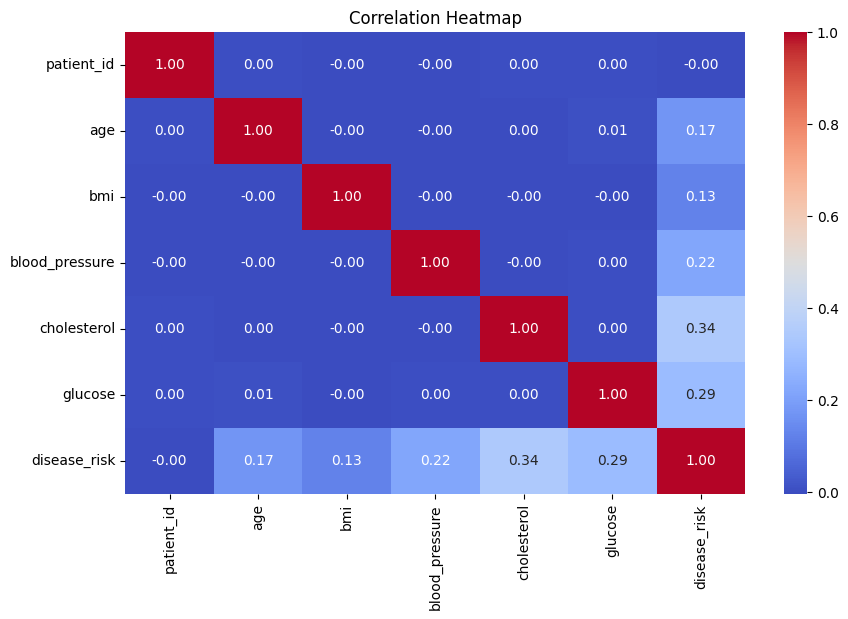

In [10]:
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

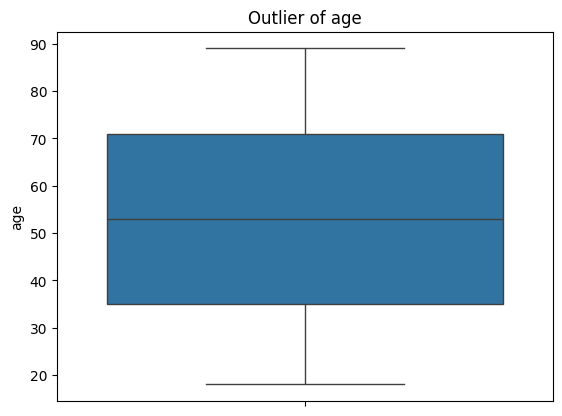

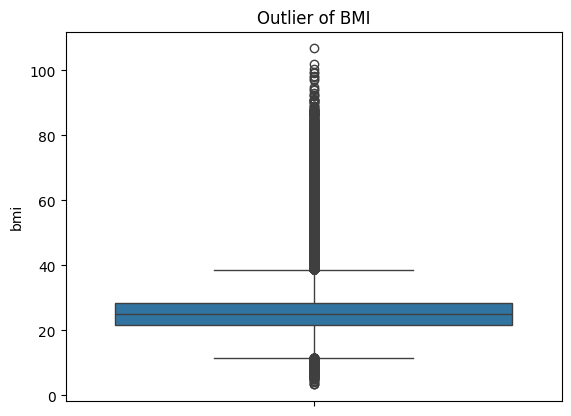

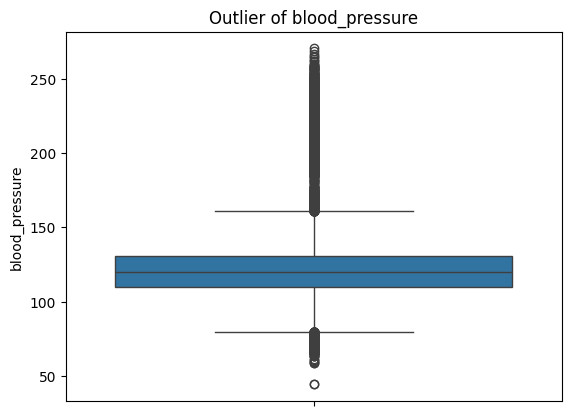

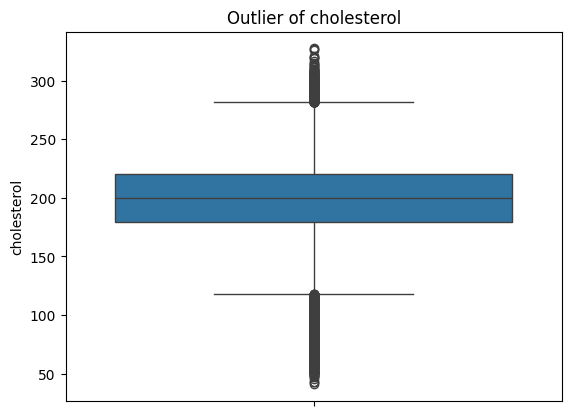

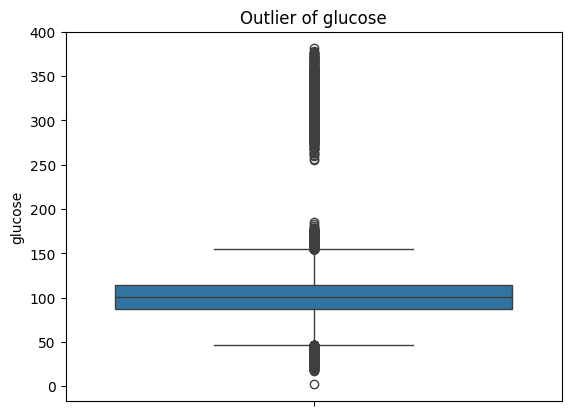

In [11]:
plt.figure()
sns.boxplot(df['age'])
plt.title("Outlier of age")
plt.show()

plt.figure()
sns.boxplot(df['bmi'])
plt.title("Outlier of BMI")
plt.show()

plt.figure()
sns.boxplot(df['blood_pressure'])
plt.title("Outlier of blood_pressure")
plt.show()

plt.figure()
sns.boxplot(df['cholesterol'])
plt.title("Outlier of cholesterol")
plt.show()

plt.figure()
sns.boxplot(df['glucose'])
plt.title("Outlier of glucose")
plt.show()


In [12]:
df.columns


Index(['patient_id', 'age', 'gender', 'region', 'bmi', 'blood_pressure',
       'cholesterol', 'glucose', 'disease_risk'],
      dtype='object')

In [13]:
df[['patient_id', 'age', 'gender', 'region', 'bmi',
    'blood_pressure', 'cholesterol', 'glucose',
    'disease_risk']].isna().sum()


patient_id            0
age               10000
gender             9959
region            10170
bmi                6000
blood_pressure        0
cholesterol        8000
glucose            6000
disease_risk          0
dtype: int64

In [14]:
df.head()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,1,69.0,Male,North,32.27,116.58,184.29,77.47,0
1,2,32.0,Male,East,18.83,122.60,196.59,92.93,0
2,3,89.0,Female,North,24.99,125.70,206.05,96.28,1
3,4,78.0,Male,East,24.26,117.13,NaN,80.78,0
4,5,38.0,Male,South,31.50,128.49,NaN,57.46,0


In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

df[num_cols] = imputer.fit_transform(df[num_cols])


In [17]:
df[['patient_id', 'age', 'gender', 'region', 'bmi',
    'blood_pressure', 'cholesterol', 'glucose',
    'disease_risk']].isna().sum()


patient_id            0
age                   0
gender             9959
region            10170
bmi                   0
blood_pressure        0
cholesterol           0
glucose               0
disease_risk          0
dtype: int64

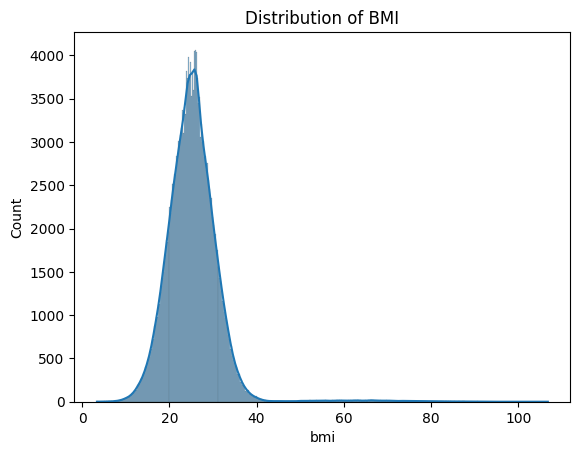

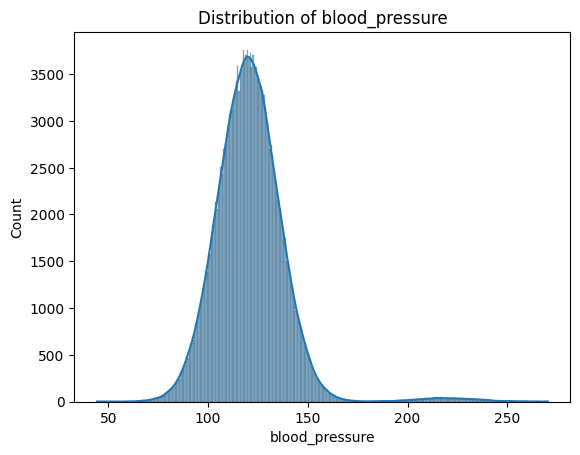

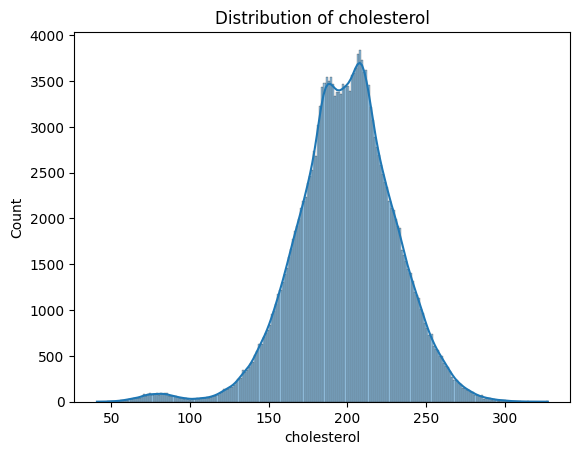

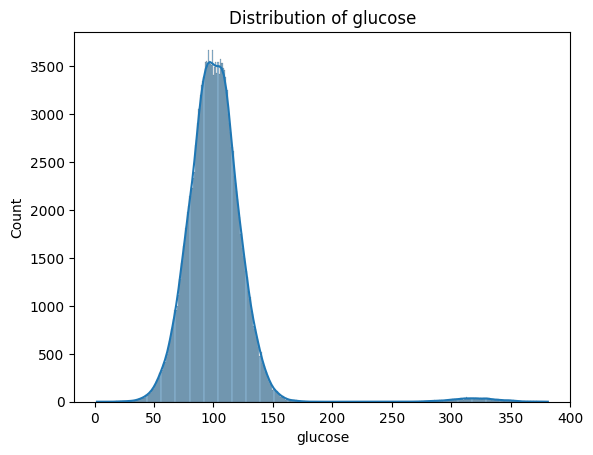

In [18]:
plt.figure()
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.show()

plt.figure()
sns.histplot(df['blood_pressure'], kde=True)
plt.title("Distribution of blood_pressure")
plt.show()

plt.figure()
sns.histplot(df['cholesterol'], kde=True)
plt.title("Distribution of cholesterol")
plt.show()

plt.figure()
sns.histplot(df['glucose'], kde=True)
plt.title("Distribution of glucose")
plt.show()




In [19]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & 
            (df[col] <= Q3 + 1.5 * IQR)]


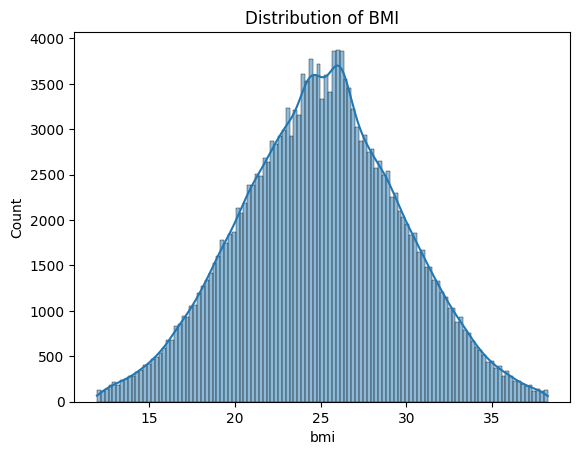

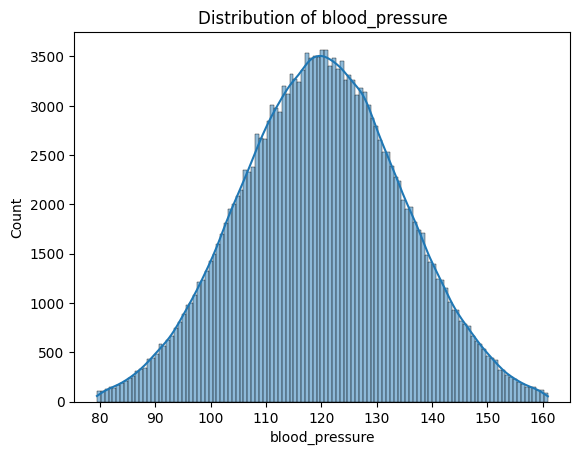

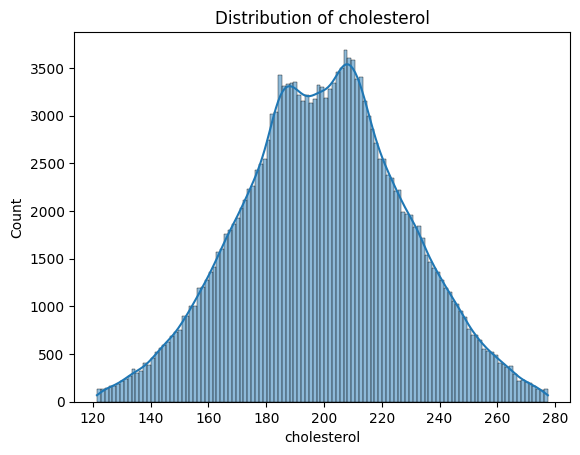

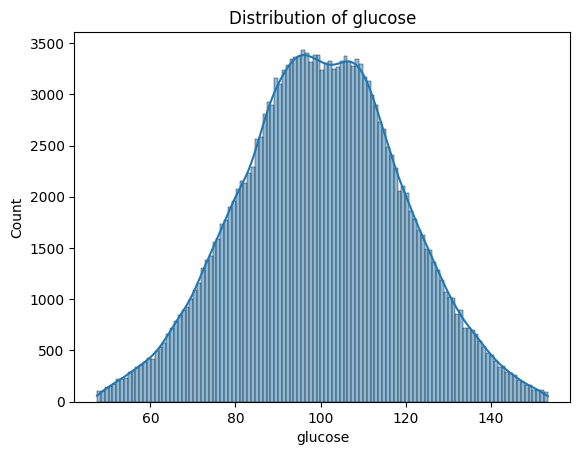

In [20]:
plt.figure()
sns.histplot(df['bmi'], kde=True)
plt.title("Distribution of BMI")
plt.show()

plt.figure()
sns.histplot(df['blood_pressure'], kde=True)
plt.title("Distribution of blood_pressure")
plt.show()

plt.figure()
sns.histplot(df['cholesterol'], kde=True)
plt.title("Distribution of cholesterol")
plt.show()

plt.figure()
sns.histplot(df['glucose'], kde=True)
plt.title("Distribution of glucose")
plt.show()




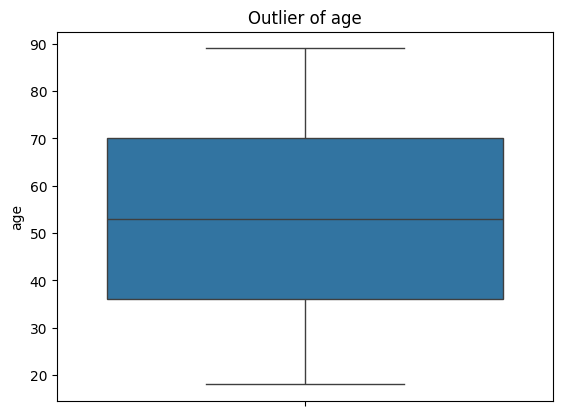

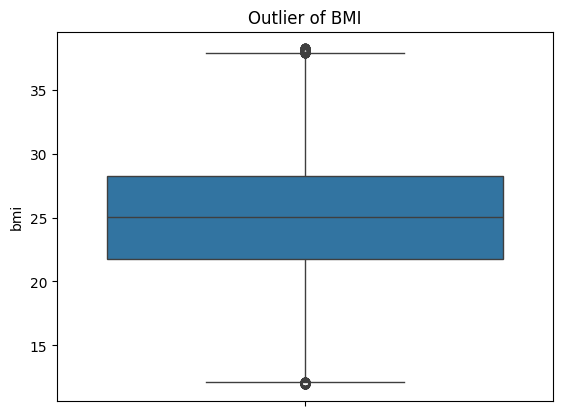

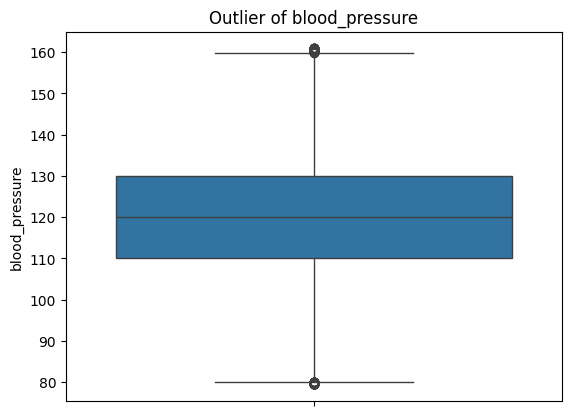

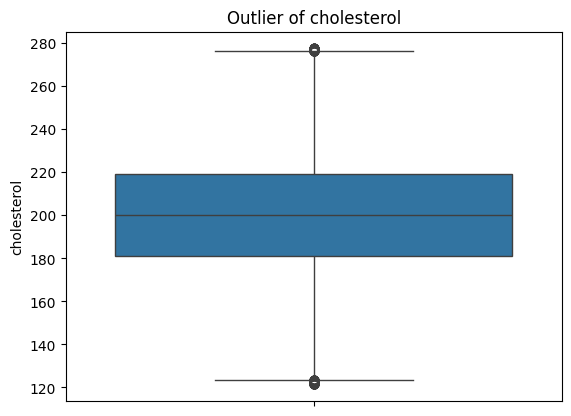

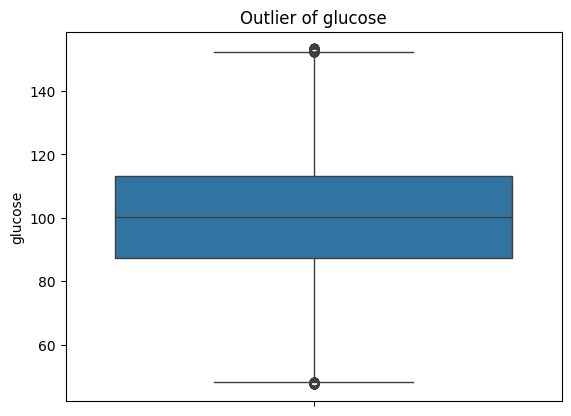

In [21]:
plt.figure()
sns.boxplot(df['age'])
plt.title("Outlier of age")
plt.show()

plt.figure()
sns.boxplot(df['bmi'])
plt.title("Outlier of BMI")
plt.show()

plt.figure()
sns.boxplot(df['blood_pressure'])
plt.title("Outlier of blood_pressure")
plt.show()

plt.figure()
sns.boxplot(df['cholesterol'])
plt.title("Outlier of cholesterol")
plt.show()

plt.figure()
sns.boxplot(df['glucose'])
plt.title("Outlier of glucose")
plt.show()


In [22]:
df[['patient_id', 'age', 'gender', 'region', 'bmi',
    'blood_pressure', 'cholesterol', 'glucose',
    'disease_risk']].isna().sum()


patient_id           0
age                  0
gender            9249
region            9497
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
disease_risk         0
dtype: int64

In [23]:
df.head()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
0,1.0,69.0,Male,North,32.27,116.58,184.290000,77.47,0.0
1,2.0,32.0,Male,East,18.83,122.60,196.590000,92.93,0.0
2,3.0,89.0,Female,North,24.99,125.70,206.050000,96.28,1.0
3,4.0,78.0,Male,East,24.26,117.13,184.504531,80.78,0.0
4,5.0,38.0,Male,South,31.50,128.49,188.138372,57.46,0.0


In [24]:
df['region'].unique()

array(['North', 'East', 'South', 'West', nan], dtype=object)

In [25]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})


In [26]:
df['gender'].unique()

array([ 1.,  0., nan])

In [27]:
df['region'] = df['region'].map({'North': 1, 'East': 2,'South': 3,'West': 4})


In [28]:
df['region'].unique()

array([ 1.,  2.,  3.,  4., nan])

In [29]:
df[['patient_id', 'age', 'gender', 'region', 'bmi',
    'blood_pressure', 'cholesterol', 'glucose',
    'disease_risk']].isna().sum()


patient_id           0
age                  0
gender            9249
region            9497
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
disease_risk         0
dtype: int64

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)

df[num_cols] = imputer.fit_transform(df[num_cols])


In [31]:
df[['patient_id', 'age', 'gender', 'region', 'bmi',
    'blood_pressure', 'cholesterol', 'glucose',
    'disease_risk']].isna().sum()


patient_id           0
age                  0
gender            9249
region            9497
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
disease_risk         0
dtype: int64

In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(
    imputer.fit_transform(df),
    columns=df.columns
)


In [33]:
df_imputed.isna().sum()


patient_id        0
age               0
gender            0
region            0
bmi               0
blood_pressure    0
cholesterol       0
glucose           0
disease_risk      0
dtype: int64

In [34]:
df = df_imputed

In [35]:
df.describe()

,patient_id,age,gender,region,bmi,blood_pressure,cholesterol,glucose,disease_risk
count,186388.000000,186388.000000,186388.000000,186388.000000,186388.000000,186388.000000,186388.000000,186388.000000,186388.000000
mean,99994.013724,53.373318,0.504605,2.486790,25.022074,119.996844,199.939632,100.142115,0.556511
std,57725.756998,20.261680,0.487418,1.082433,4.753311,14.572484,28.507634,19.120025,0.496798
min,1.000000,18.000000,0.000000,1.000000,11.940000,79.470000,121.410000,47.440000,0.000000
25%,50013.750000,36.000000,0.000000,2.000000,21.790000,109.970000,180.843910,87.170000,0.000000
50%,99953.500000,53.000000,0.505617,2.485498,25.050000,120.000000,200.100000,100.130000,1.000000
75%,149964.250000,70.000000,1.000000,3.000000,28.230000,129.930000,219.000000,113.150000,1.000000
max,200000.000000,89.000000,1.000000,4.000000,38.250000,160.900000,277.510000,153.420000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186388 entries, 0 to 186387
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patient_id      186388 non-null  float64
 1   age             186388 non-null  float64
 2   gender          186388 non-null  float64
 3   region          186388 non-null  float64
 4   bmi             186388 non-null  float64
 5   blood_pressure  186388 non-null  float64
 6   cholesterol     186388 non-null  float64
 7   glucose         186388 non-null  float64
 8   disease_risk    186388 non-null  float64
dtypes: float64(9)
memory usage: 12.8 MB
